End to end multi-class dog breed classification

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#!unzip "drive/My Drive/Colab Notebooks/dog vision/dog-breed-identification.zip" -d "drive/My Drive/Colab Notebooks/dog vision/"

In [0]:
## import tensor flow into colab
import tensorflow as tf 
print("Tf version", tf.__version__)

Tf version 2.2.0


In [0]:
## Import necessary tools
import tensorflow_hub as hub
print("Tensor flow hub", hub.__version__)

## check or GPU avaliability
print("GPU", "Availability(YES)" if tf.config.list_physical_devices("GPU") else "not avaliable:(")

Tensor flow hub 0.8.0
GPU Availability(YES)


Getting Our Data Ready(Turning into Tenses).

With all machine learning  models, our data has to be in a numerical Format. So that what we doing turning our images into tenses (Numerical form)

In [0]:
## Lets start by accessing our data and checking out labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dog vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b2b05fba50969ecd8ae5a8351dc273b6  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [0]:
## How amny images of each bread
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

## Visualizing Each breed

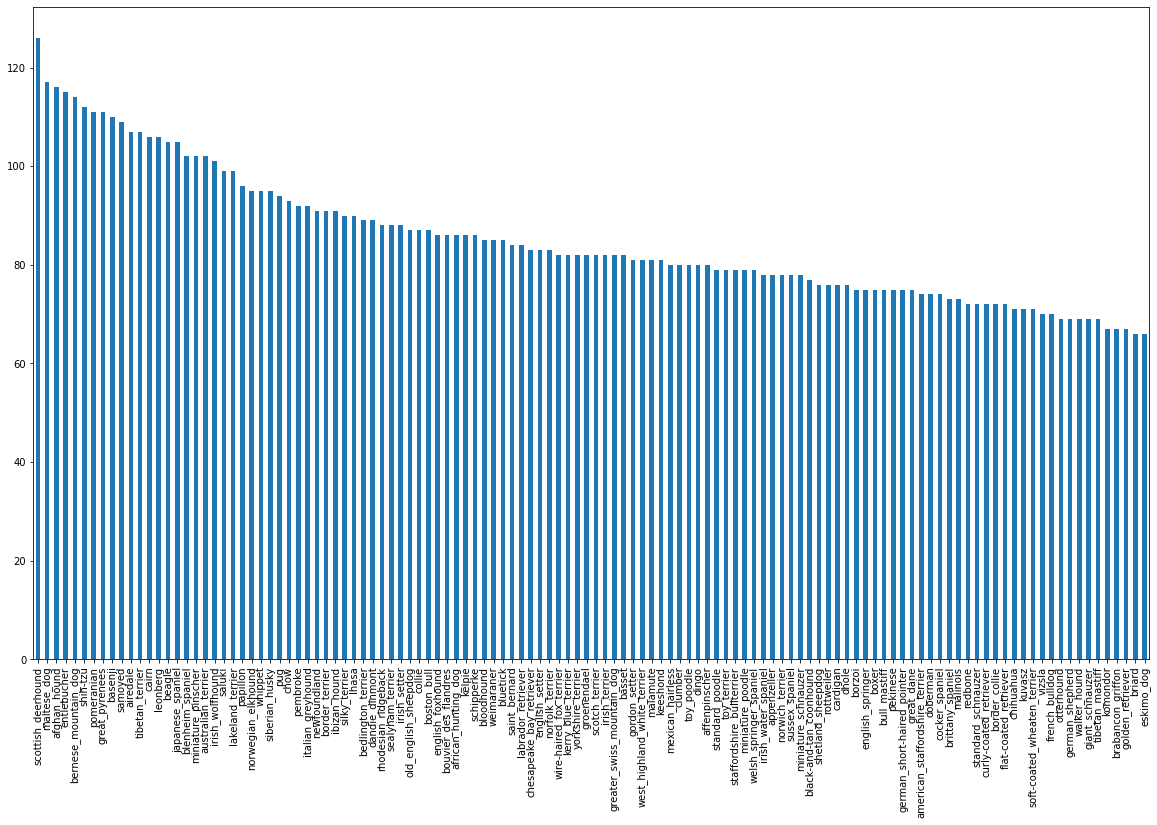

In [0]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20,12))

In [0]:
labels_csv["breed"].value_counts().median()

82.0

## Preparing The Images

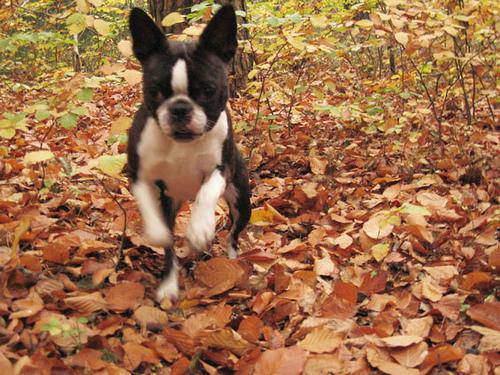

In [0]:
## Lets view an image
from IPython.display import Image
Image("drive/My Drive/Colab Notebooks/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and Labels

let's Get List of our imgaes file Pathnames

In [0]:
## Create pathnames from Images Id's
filenames = ["drive/My Drive/Colab Notebooks/dog vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

# Check for first 10
filenames[:10]

['drive/My Drive/Colab Notebooks/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
## Check whether number of filenames matches number of actual images files
import os
if len(os.listdir("drive/My Drive/Colab Notebooks/dog vision/train/")) == len(filenames):
  print("Same amount of files !!! Good To Go")
else:
  print("Files Do Not match the Actual amount of files Check the target Directory")  

Same amount of files !!! Good To Go


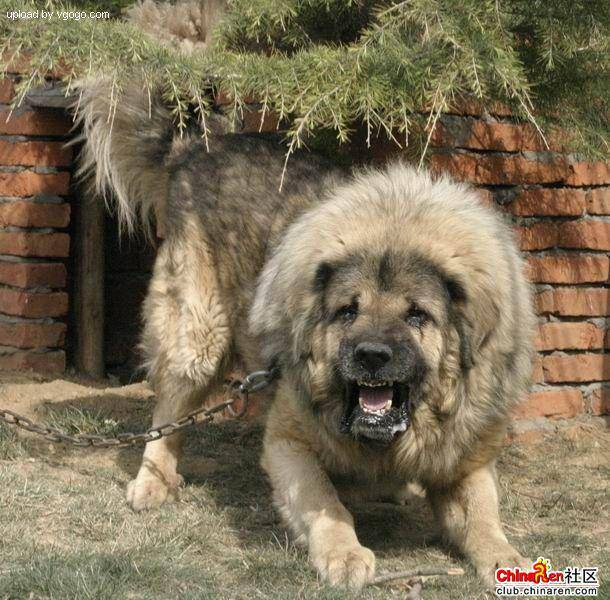

In [0]:
## One more check
Image(filenames[9000])

In [0]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Turning Labels Data Into Numbers

Since Now we've got our training filepaths in a list , lets prepare our labels.

In [0]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
## Does Same thing as Below
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
len(labels)

10222

## Checking For the Missing Values

In [0]:
## See If Number Of Labels Matches The Number Of Filenames
if len(labels) == len(filenames):
  print("Numer of labels matches number of filenames")
else:
  print("Do not Match")

Numer of labels matches number of filenames


In [0]:
## Find the unique Labels value
## unique_breeds = labels_csv["breed"].unique()

# Does the same thing as abovw
unique_breeds = np.unique(labels)
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
## Turn a Single label into an array Of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
## Turn Every labels Into Boolean Array 
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
len(boolean_labels)

10222

In [0]:
## Example Turning Boolean Array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))# Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occur in boolean array
print(boolean_labels[0].astype(int)) ## There will be a 1 Where Sample label Occur


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


 FilePath are Filenames

## Creating Our own validation Set

Since a validation set is not come from kaggle so we create our Own set

In [0]:
## Setup X and y Variables
X=filenames

y=boolean_labels

In [0]:
len(filenames)

10222

we are going to start off Experimenting with 1000 images
and increase as needed

In [0]:
## Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:10}

In [0]:
## Lets split our Data Into train and validation set
from sklearn.model_selection import train_test_split

np.random.seed(42)

# split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [0]:
## Lets have a geez at the training Data
X_train[:5], y_train[:5]

(['drive/My Drive/Colab Notebooks/dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Colab Notebooks/dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Colab Notebooks/dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Colab Notebooks/dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Colab Notebooks/dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

## Preprocessing images(Turning Images into Tensors)

To preprocess our images into  tenses we write a function That performs some thing
1. Take an Image file path as input
2. Use the tensorflow to read the file and save into a variable, 'Images'
3. Turn images into Tensors
4. Normalize our image (convert image channel from 0-255 to 0-1)
5. Resize the  image of the shape of(224,224)

6. Return The Modified image

Before we do Lets see what importing Image looks Like

In [0]:
## Convert a Image Into a numpy Array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape
## (Height, Width, colorchannel(Range from 0-255))

(257, 350, 3)

In [0]:
image.max(), image.min()

(255, 0)

In [0]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [0]:
## turn Image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we have seen a what an image look like lets build The function for above listed steps

In [0]:
# Define IMage size
IMG_SIZE = 224
# Create an function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Take an Image File Path and Turns The image into tensor
  """
  ## Read Image File
  #Below do reads and outputs the entire contents of the input file name
  # Return a tensor of type string
  image = tf.io.read_file(image_path)
  #Turn the JPEG image into numerical tensor with three 
  ##Colour channel red, green blue
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel value from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  ## rezie the image to our desired value(224,224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image 


In [0]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [0]:
tf.image.decode_jpeg(tensor, channels=3)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

## Turing Our Data into batches

Why turn our data into batches??

lets say you are trying to train 10000 images in one go...
they will not fit into memory

so thats why we make batch of 32 images at a time (you can manually adjust batch size if necessory)


In order to use the Tensor flow effectively we need our data in the form of tensor tuples which look like this:

(image, labels)

In [0]:
## create a function to return a tuple(image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [0]:
# demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to turn our data into tuples of tensors in the form: (image, labels), lets make a function to turn all our data into (X&y), batches

In [0]:
# define the batch size , 32 is a good start
BATCH_SIZE=32
## create a function to turn data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE, valid_data = False, test_data = False):
  """
  create batches of data out of image (X), and labels (y) pairs
  shuffles the data if it's training data but doesn't shuffle if 
  it is training data 
  Also accepts test data as input (no labels)
  """
  # if the data is the test data set, we probably have no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #Only file path(No labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

    ## If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
      print("Creating Validation Data batches...")
      #As testing data has no labels we don't use get_image_label function we maked
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # Filepaths and labels
      #As testing data has no labels we don't use get_image_label function we maked
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)

      return data_batch

  else:
        print("Create a training data batches")
        #turn filepaths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

        ## Shuffling pathnames and labels mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
        
        #create(image, label) tuples (This also turns the image path into a preprocess image)
        data = data.map(get_image_label)

        # Turn training data into batches
        data_batch  = data.batch(BATCH_SIZE)

  return data_batch  




In [0]:
## create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Create a training data batches
Creating Validation Data batches...


In [0]:
## Check out different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(X_train[:1]), tf.constant(y_train[:1]))) #Only file path(No labels)
data_batch = data.map(process_image).batch(BATCH_SIZE)
data

<TensorSliceDataset shapes: ((), (120,)), types: (tf.string, tf.bool)>

In [0]:
data_batch

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

## Visualizing the Data Batches

our data is now in matches this can be little hard to understand/comprehend. Lets visualize them.


In [0]:
import matplotlib.pyplot as plt

## Create a function for viewing images as a Data batch
def show_25_images(image, labels):
  """
  display a plot of 25 images and the labels from a data batch
  """
  # setup the figure
  plt.figure(figsize = (20,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots(5 rows ,5 columns)
    ax = plt.subplot(5,5,i+1) #rows,column,Index
    # Display an Image
    plt.imshow(image[i])
    #Add  the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridline off
    plt.axis("off")

In [0]:
## Unbatching the data 
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)
## the output is 32 as our batch size is 32
## Next grab the first batch of 32 images and store in into 
### train_labels, similarly with train_labels


(32, 32)

In [0]:
y[0].argmax()

19

In [0]:
## This is what we doing in the ubove function
unique_breeds[y[0].argmax()]

'boston_bull'

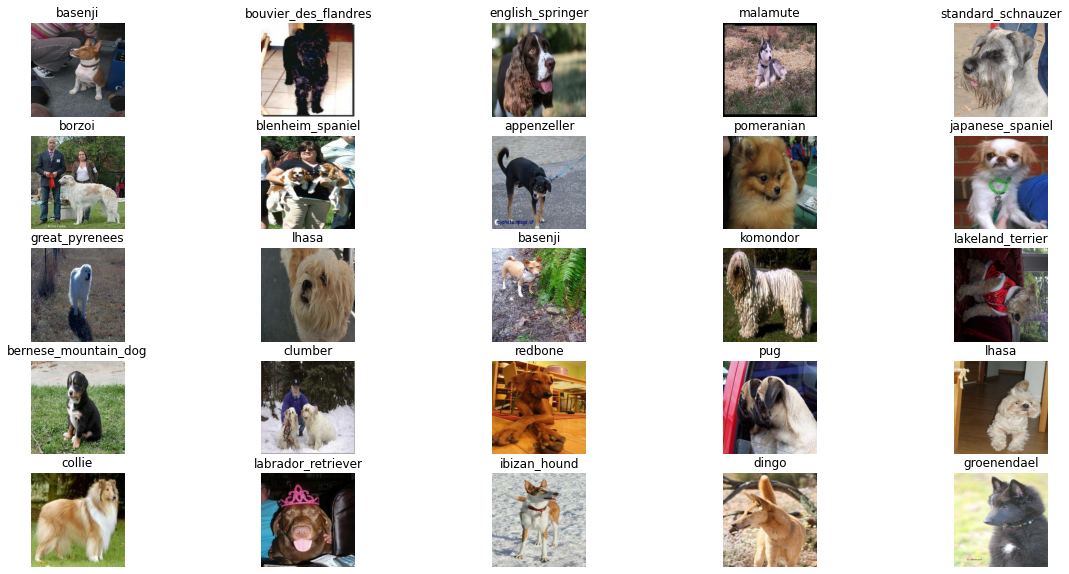

In [0]:
# Now viaualize the data in the training batch
show_25_images(train_images, train_labels)
# every time I call this images going to images
## as we make it shuffle in training batch

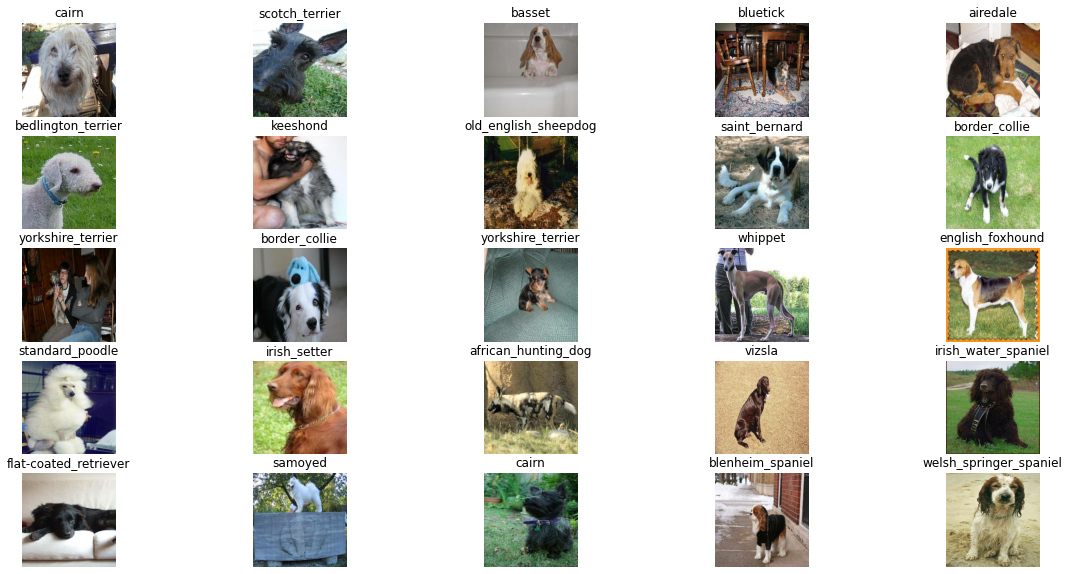

In [0]:
## Now lets visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)
## as we don't shuffle the validation data we get same 
## set of images every time we run this

## Building a model 

Before we build a model, there are a few things we
need to define
* The input shape (our images shape, in the form of Tensors) to our model
* The output shape(image labels, in the form of Tensors) of our model.
* The URl of the model we want to use.


In [0]:
IMG_SIZE

224

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch , height, width, colour channels

# setup Output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

## setup model URL from tensorflow hub
MODEL_URL ="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we have got our inputs, outputs and model. lets put them together into a keras deep learning model

KNowing this lets create a function

* Takes the input shape, output shape, and the model we have chosen as parameters.
* Defines the layers in a keras model in a sequential fashion.

* compiles the model(says, how it should be evalated and improved)

* Builds the model(tells the model the input shape it'll be getting)
* Returns the model

https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/

In [0]:
## creata a function which builds a keras model
def create_model(input_shape = INPUT_SHAPE,output_shape = OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with ", MODEL_URL)

  #Setting up model layer
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #Layer 1 input layer
    tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                          activation = "softmax") #layer 2 output layer
  ])

  #compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [0]:
model = create_model()
model.summary()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_5 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

callbacks are helper function a model can use during 
training such as to do things as save its progress , check its progress  or stop the training early if model is stop improving.

https://www.tensorflow.org/guide/keras/custom_callback

we'll create 2 callbacks one for the TensorBoard which helps track our model progress, And another for early stopping which prevents our model from training for too long....


## TensorBoard CallBack

to setup a tensor board call baxk we need to do 3 things

1. Load TensorBoard notebook Extension.

2. Create a tensorNoard call back which is able to save a log during training and pass it to our model's fit() function.

3. Visualize our model training logs with '%tensorboard' magic fucntion(we'll do this after model training)


In [0]:
# load TensorBoard notebook extension
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime

# create a function to build a Tensorboarc callback
def create_tensorboard_callback():
  #create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Colab Notebooks/dog vision/logs",
                        # make it so logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


## Early stoping Callback which prevent overlifting by stoping it overtraining. if a certain Evaluation metrics stops improving,



https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping



In [0]:
# create a early stopping callbaclk
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience =3)


## Training a model(on subset of data)
our first model is going to train on the 1000 images ,
to make sure that every thing working.
or to minimise our time between Experiments

* below epochs is giving our model is to no. of chances to look into the train data and validating the data on the basis of what it has saw in training data, To figure out The patterns

In [0]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [0]:
## check to make sure that we still runing on a GPU
print("GPU", "avaliable(YES!!!!!)" if tf.config.list_physical_devices("GPU") else "Not Avaliable")

GPU avaliable(YES!!!!!)


## lets create a function to train a model

* Create a model using "create_model()"
* Setup a Tensorboard function callback"Create_tensorboard_callback"
* call the fit() function on our model passing it training data, Validation data, Number of epochs to train for and the callbacks
* Return the model

In [0]:
# create a function to train and return the trained model
def train_model():
  #create a model
  model = create_model()
  #create new TensorBoard sesion everytime train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we have created
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  #Return the fitted model
  return model

In [0]:
## Fit the model to the data
model = train_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/25 [=>............................] - ETA: 5s - loss: 5.4484 - accuracy: 0.0156    WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.191431). Check your callbacks.


25/25 [==============================] - 5s 199ms/step - loss: 4.5845 - accuracy: 0.1063 - val_loss: 3.3690 - val_accuracy: 0.3150
Epoch 2/100
25/25 [==============================] - 4s 179ms/step - loss: 1.5900 - accuracy: 0.7138 - val_loss: 2.1598 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 4s 180ms/step - loss: 0.5448 - accuracy: 0.9450 - val_loss: 1.6720 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2491 - accuracy: 0.9875 - val_loss: 1.4750 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 4s 177ms/step - loss: 0.1450 - accuracy: 0.9975 - val_loss: 1.4096 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 4s 178ms/step - loss: 0.0993 - accuracy: 1.0000 - val_loss: 1.3528 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================] - 4s 178ms/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 1.3307 - val_accuracy: 0.6550
Epoch 8/100

### Checking the tensorboard logs

The TensorBoard magic function ('%tensorboard') will acess the logs directory we created earlier and visualize its contents

In [0]:
%tensorboard --logdir /content/drive/My\ Drive/Colab\ Notebooks/dog\ vision/logs

Reusing TensorBoard on port 6006 (pid 1628), started 3:53:55 ago. (Use '!kill 1628' to kill it.)

<IPython.core.display.Javascript object>

## Making and evaluating Prediction using a trained model


In [0]:
# make prediction on the validation data
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 120ms/step


array([[2.9359257e-03, 9.3041669e-04, 4.7127404e-03, ..., 4.6336703e-04,
        6.1498511e-05, 1.2489259e-02],
       [7.7851157e-04, 8.3381991e-04, 2.9800285e-03, ..., 9.1587636e-04,
        2.6219373e-04, 1.3136507e-04],
       [5.0036604e-05, 3.4942372e-05, 3.8137910e-06, ..., 1.8316213e-04,
        6.1112391e-05, 9.5288153e-05],
       ...,
       [2.5000277e-06, 4.4958206e-06, 2.6865220e-05, ..., 3.2311104e-06,
        2.1698681e-05, 8.4146668e-06],
       [2.3845937e-03, 4.5840181e-05, 1.9146115e-05, ..., 7.5804775e-05,
        9.6086842e-05, 4.2632548e-03],
       [9.0642687e-04, 3.2491211e-05, 4.0887804e-03, ..., 2.2886195e-03,
        6.0350244e-04, 2.7314888e-04]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
# for 1 one image
# this contains the probabilities for each breed for the 
# first value. The highest probabilities here or the highest
# value here corespondence to the predicted image
predictions[0]

array([2.93592573e-03, 9.30416689e-04, 4.71274043e-03, 4.62264463e-04,
       3.95439303e-04, 6.27662666e-05, 6.97810855e-03, 3.10473581e-04,
       1.05371160e-04, 3.68827255e-03, 5.24049625e-04, 2.44484836e-04,
       1.21551959e-04, 3.52439616e-04, 4.25416569e-04, 7.99820933e-04,
       2.11692182e-04, 1.24488585e-01, 3.66327877e-05, 6.94761256e-05,
       4.97688912e-03, 3.07832350e-04, 5.18955130e-05, 2.47969641e-03,
       6.42869127e-05, 2.62711023e-04, 5.77690788e-02, 1.41173950e-04,
       2.39078305e-03, 3.45075765e-04, 9.68581953e-05, 1.50439341e-03,
       2.50018289e-04, 2.20920920e-05, 4.51192172e-05, 6.11628927e-02,
       6.90723391e-05, 1.33543729e-03, 1.53192028e-04, 4.38363932e-04,
       1.60875684e-03, 4.45450605e-05, 5.79295775e-05, 1.15768758e-04,
       1.71952459e-04, 2.09161444e-04, 3.20568033e-05, 1.80097151e-04,
       7.49970495e-04, 4.74315166e-04, 7.95212633e-04, 4.57810122e-04,
       7.15424947e-04, 8.12079961e-05, 4.82283103e-05, 4.68488215e-05,
      

In [0]:
## Probabilities is not going to be more than 1
np.sum(predictions[0])

1.0

In [0]:
## First prediction
print(predictions[0])
print(f"max value (probability of prediction:{np.max(predictions[0])}")
print(f"sum: {np.sum(predictions[0])}")
print(f"Max index:{np.argmax(predictions[0])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[0])]}")


[2.93592573e-03 9.30416689e-04 4.71274043e-03 4.62264463e-04
 3.95439303e-04 6.27662666e-05 6.97810855e-03 3.10473581e-04
 1.05371160e-04 3.68827255e-03 5.24049625e-04 2.44484836e-04
 1.21551959e-04 3.52439616e-04 4.25416569e-04 7.99820933e-04
 2.11692182e-04 1.24488585e-01 3.66327877e-05 6.94761256e-05
 4.97688912e-03 3.07832350e-04 5.18955130e-05 2.47969641e-03
 6.42869127e-05 2.62711023e-04 5.77690788e-02 1.41173950e-04
 2.39078305e-03 3.45075765e-04 9.68581953e-05 1.50439341e-03
 2.50018289e-04 2.20920920e-05 4.51192172e-05 6.11628927e-02
 6.90723391e-05 1.33543729e-03 1.53192028e-04 4.38363932e-04
 1.60875684e-03 4.45450605e-05 5.79295775e-05 1.15768758e-04
 1.71952459e-04 2.09161444e-04 3.20568033e-05 1.80097151e-04
 7.49970495e-04 4.74315166e-04 7.95212633e-04 4.57810122e-04
 7.15424947e-04 8.12079961e-05 4.82283103e-05 4.68488215e-05
 1.54423047e-04 8.46305396e-03 1.12820207e-03 4.09782566e-02
 2.78794585e-04 2.38422203e-04 1.59215461e-03 1.78172108e-04
 3.80161731e-03 1.637846

In [0]:
unique_breeds[17]

'border_terrier'

Having  the above functionality is great but we want to to do in  a scael
but it will be great to see the predicted value image

***Note*** : Prediction Probabilites also known as Confidence levels

In [0]:
# turn prediction probabilities into their respective labels
def get_pred_label(prediction_prob):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_prob)]

# Get a predicted label based on a array of prediction probabilities
pred_label = get_pred_label(predictions[0]) 
pred_label


'komondor'

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

# now since our validation data is in batch dataset
we'll have to unbatch to make prediction to validation images 
and compare images those predictions to the validation labels(Truth label)



In [0]:
# create a function to unbatch a batch dataset
def unbatchify(data):
  images_= []
  labels_=[]

  for images, labels in data.unbatch().as_numpy_iterator():
    images_.append(images)
    labels_.append(unique_breeds[np.argmax(labels)])

  return images_, labels_  

## Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)  
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
get_pred_label(val_labels[0])

'affenpinscher'

In [0]:
images_= []
labels_=[]

for images, labels in val_data.unbatch().as_numpy_iterator():
  images_.append(images)
  labels_.append(labels)

images_[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

In [0]:
get_pred_label(labels_[0])

'cairn'

In [0]:
# This means that predicted value is worng 
get_pred_label(predictions[0])

'komondor'

Now we have to get 
* prediction label
* truth label
* validation images

lets make some function to make these all a bit more visualize


we'll create a function
* Takes an array of prediction probibilties
array of truth labels
array of images and integers

* convert the prediction probabilities to a predicted labels

* PLot the predicted label. its preidcted probabilities , the truth label and the target image on a single plot

In [0]:
def plot_pred(prediction_probabilities, labels, images , n=1):
  """
  view the prediction, ground truth adn image for sample n
  """
  pred_prob, truth_labels, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_labels = get_pred_label(pred_prob)

  #plot image and remove the ticks '
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the colour of the titile depending on the prediction is right or wrong
  if pred_labels == truth_labels:
    color = 'green'

  else:
    color = 'red'  
  #change the plot title to the predicted , probability of prediction and truth label
  plt.title("{}  {:2.0f} {}".format(pred_labels, np.max(pred_prob)*100,
                                    truth_labels),
                                    color = color)

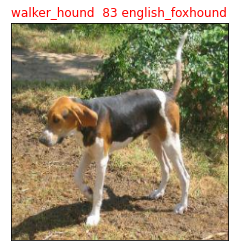

In [0]:
plot_pred(prediction_probabilities = predictions,
          labels = val_labels,
          images = val_images, 
          n=42)

Now we have got 1 function to visualize our model prediction

lets make another to see our model top 10 predictions

The function will:

*  Take an input of prediction probabilities array and a ground truth array and an integer

* Find the predicted label using get_pred_labels

* Find the top 10:
   * Prediction probabilities images 
   * Prediction Probabilities values
   * prediciton labels

* plot the top 10 probabilities value and labels    

In [0]:
def plot_pred_conf(prediciton_probabilities , labels, n=1):
  """
  plot the top 10 highest confidences along with the truth label for sample n
  """
  pred_prob , true_label = prediciton_probabilities[n], labels[n]

  # get prediction label
  pred_label = get_pred_label(pred_prob)

  #find the top 10 prediction confidences indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  #Find the 10 prediction confidences
  top_10_pred_values= pred_prob[top_10_pred_indexes]

  #topn 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # set up plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')
  
  #change the color of the true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')

  else:
    pass  

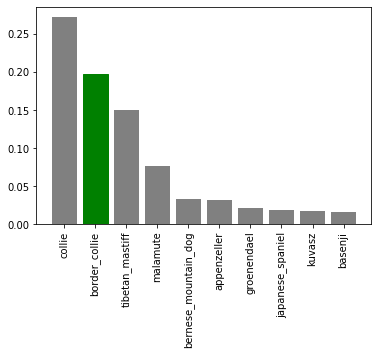

In [0]:
plot_pred_conf(prediciton_probabilities=predictions,
               labels = val_labels,
               n=9)

In [0]:
# returns a sorted array of indexes
predictions[0].argsort()

array([ 92, 107,  33,  46,  18,  41,  34,  55,  54,  22,  69,  42, 118,
         5,  24,  36,  19,  53, 115, 112,  75,  30,  91, 108,  84,   8,
        43,  12, 101,  27,  38,  66,  56,  94,  44,  82,  63,  47,  98,
        45,  16, 113,  61,  11,  32,  25,  87,  60,  99,  21,   7,  80,
        29,  13,   4,  14,  39,  51,   3, 117,  49,  10,  86,  88,  67,
        52,  48,  50,  15,  74,  95, 110, 114,   1,  72,  90, 104,  89,
        58,  37, 111,  31,  62,  40,  71,  78,  96,  28,  23,   0,  68,
       105,   9,  64,  85,   2,  20,  93,   6, 109,  57, 119, 102,  83,
        81,  76,  97, 116, 106,  79,  73,  77,  59, 103,  26,  35, 100,
        70,  17,  65])

In [0]:
# for top 10 and reverse it 
predictions[0].argsort()[-10:][::-1]

array([ 65,  17,  70, 100,  35,  26, 103,  59,  77,  73])

In [0]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.16378465, 0.12448858, 0.08003052, 0.07211149, 0.06116289,
       0.05776908, 0.05338581, 0.04097826, 0.03303736, 0.03272868],
      dtype=float32)

In [0]:
predictions[0].max()

0.16378465

Now we have got some finctions help us to visualize our prediction and evaluate our model lets check out few

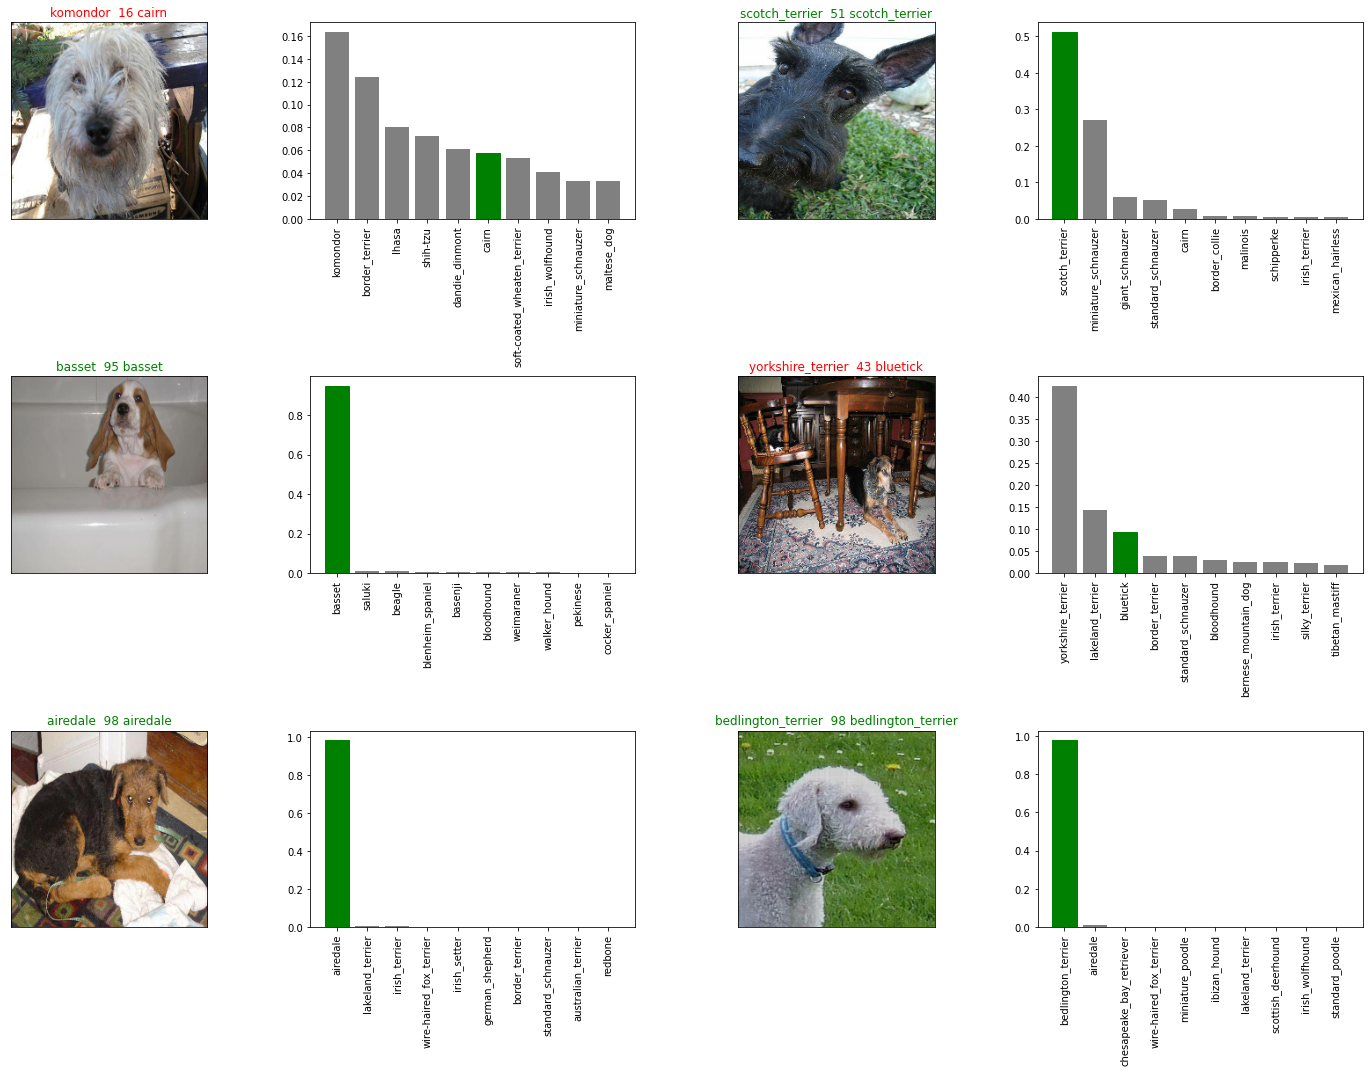

In [0]:
# lets check out a few predcitons and their different  values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediciton_probabilities = predictions,
                labels = val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)  
plt.show()

## Saving and ReLoading Our Trained Model 

In [0]:
## Create a function to save a model
def save_model(model, suffix = None):
  """
  saves a given model in a models directory and appends a suffix(string).
  """

  #create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Colab Notebooks/dog vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix+ ".h5" #save format of model

  print(f"saving model to: {model_path}....")
  model.save(model_path)

  return model_path

In [0]:
# Create a function to load a trained model
def load_model(model_path):
  """
  load a saved model from specified path 
  """
  print(f"loading saved model from : {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

Now we have got functions to save and load a trained model 

Lets make sure they work properly

In [0]:
# Save a model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

saving model to: drive/My Drive/Colab Notebooks/dog vision/models/20200517-064028-1000-images-mobilenetv2-Adam.h5....


'drive/My Drive/Colab Notebooks/dog vision/models/20200517-064028-1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Colab Notebooks/dog vision/models/20200517-035350-1000-images-mobilenetv2-Adam.h5')

loading saved model from : drive/My Drive/Colab Notebooks/dog vision/models/20200517-035350-1000-images-mobilenetv2-Adam.h5


In [0]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 99ms/step - loss: 1.2433 - accuracy: 0.6750


[1.2432990074157715, 0.675000011920929]

In [0]:
# Evalaute the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 97ms/step - loss: 1.2426 - accuracy: 0.6800


[1.2426146268844604, 0.6800000071525574]

## Training a Big dog model(On the full Data)

In [0]:
len(X), len(y)

(10222, 10222)

In [0]:
X[:10]

['drive/My Drive/Colab Notebooks/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Colab Notebooks/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
len(X_train)# Our model is now only trained on only 800 images

800

In [0]:
# Create a data batch with the full data batch
full_data = create_data_batches(X, y)


Create a training data batches


In [0]:
full_data


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
## Create a model for full model

full_model = create_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create Full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on the full data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

Runing a cell below will Take a little while(maybe up to 30 mins for the first epochs because the gpu we are running on have to reload all the images into memory.

In [0]:
# Fit the model to the full data
full_model.fit(x=full_data, 
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
320/320 [==============================] - 7193s 22s/step - loss: 1.3440 - accuracy: 0.6671
Epoch 2/100
320/320 [==============================] - 47s 145ms/step - loss: 0.3974 - accuracy: 0.8838
Epoch 3/100
320/320 [==============================] - 45s 142ms/step - loss: 0.2380 - accuracy: 0.9345
Epoch 4/100
320/320 [==============================] - 46s 145ms/step - loss: 0.1539 - accuracy: 0.9614
Epoch 5/100
320/320 [==============================] - 45s 141ms/step - loss: 0.1057 - accuracy: 0.9778
Epoch 6/100
320/320 [==============================] - 45s 140ms/step - loss: 0.0773 - accuracy: 0.9855
Epoch 7/100
320/320 [==============================] - 45s 142ms/step - loss: 0.0595 - accuracy: 0.9900
Epoch 8/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0464 - accuracy: 0.9937
Epoch 9/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0370 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 45s 140m

In [0]:
save_model(full_model, suffix = "Full-image-set-mobilenetv2-Adam")

saving model to: drive/My Drive/Colab Notebooks/dog vision/models/20200517-062857-Full-image-set-mobilenetv2-Adam.h5....


'drive/My Drive/Colab Notebooks/dog vision/models/20200517-062857-Full-image-set-mobilenetv2-Adam.h5'

In [0]:
#load in the full model
loaded_full_model = load_model('drive/My Drive/Colab Notebooks/dog vision/models/20200517-062857-Full-image-set-mobilenetv2-Adam.h5')

loading saved model from : drive/My Drive/Colab Notebooks/dog vision/models/20200517-062857-Full-image-set-mobilenetv2-Adam.h5


## Making Prediction On the Test Data Set

Since our model has been trained on the images of the form of tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created "Create Data Batches()" earlier can take a list of file name as an input and convert them to tensor batches.

To make prediction on the test data.
* Get the test image file name
* Convert the file name into test data batches using"create_data_batches()" and setting "test_data" parameter to True

* Make a Predictions array by passing the test batches to the "predict()"method on our model


In [0]:
# load a test image file name
test_path="/content/drive/My Drive/Colab Notebooks/dog vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]


In [0]:
# create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

Calling predict() on our full model
and passing it test data batch will take a long time to run(about an hour)

In [0]:
## make prediction on the test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

NotFoundError: ignored

In [0]:
p0